In [1]:
import pandas as pd

from tqdm.notebook import tqdm
df = pd.read_csv('../dataset/raw_dataset.csv')
df.sort_values(by=['created_at'], inplace=True)
print(df.head())

tqdm.pandas()

             id                                  change_id  \
735913  1104031  I4efe55a84645a30f66f413cd614e5387582577aa   
735914  1104032  I4efe55a84645a30f66f413cd614e5387582577aa   
293385   661203  I32e56a9b18b5feeb41b583081e95421cf1984522   
293386   661204  I32e56a9b18b5feeb41b583081e95421cf1984522   
293387   661205  I32e56a9b18b5feeb41b583081e95421cf1984522   

                                      message_id  author  real_author  \
735913  fd006a75943b16c9ae1bddc497adb04f5fefd2fa    1782         1782   
735914  2611482eaf227257feec82a61631547293d82aa2    1782         1782   
293385  a283141cc95dfd068c13845eeb579a6b0bc422ec    1176         1176   
293386  050d7f37c0f9f6d87a15e538967729c38a387006    1176         1176   
293387  b475141a088f5d838311aca15e4eb50a50ad1f45    1176         1176   

                           created_at                message  revision_number  \
735913  2012-08-02 19:09:55.000000000  Uploaded patch set 2.                2   
735914  2012-08-02 19:11:1

In [2]:
# table II number of recheck after CI fails
# at the code review level

# change from build fail to build count

total_build = 0
total_recheck = 0

for change_id, group in tqdm(df.groupby(['change_id'])):
    build = False
    recheck = False
    
    for ind, col in group.iterrows():
        
        if ('build' in col['message'].lower() or 'merge' in col['message'].lower()) and col['is_bot']:
            build = True
        
        if not build:
            continue
            
        if 'recheck' in col['message'].lower() and not col['is_bot']:
            recheck = True
            
    if build:
        total_build += 1
    
    if recheck:
        total_recheck += 1
        
print(f"Code Reviews # With CI jobs: {total_build}, Invoked Rechecks: {total_recheck} ({round(total_recheck * 100 / total_build)})%")
      

  0%|          | 0/66932 [00:00<?, ?it/s]

Code Reviews # With CI jobs: 65533, Invoked Rechecks: 24293 (37)%


In [3]:
# table II number of recheck after CI fails at the patch set level

# Fig 2 Proportion of patch sets and number of invoked rechecks
# count how many recheck after build fail

total_build = 0
total_recheck = 0

recheck_list = []
for change_id, group in tqdm(df.groupby(['change_id','revision_number'])):
    build_fail = False
    recheck_count = 0
    
    for ind, col in group.iterrows():
        
        if ('build' in col['message'].lower() or 'merge' in col['message'].lower()) and col['is_bot']:
            build = True
        
        if not build:
            continue
            
        if 'recheck' in col['message'].lower() and not col['is_bot']:
            recheck_count += 1
            
    if build:
        total_build += 1
    
    if recheck_count:
        total_recheck += 1
        recheck_list.append(recheck_count)
        
print(f"Patch sets # With CI jobs: {total_build}, Invoked Rechecks: {total_recheck} ({round(total_recheck * 100 / total_build)})%")
      

  0%|          | 0/267239 [00:00<?, ?it/s]

Patch sets # With CI jobs: 267239, Invoked Rechecks: 41376 (15)%


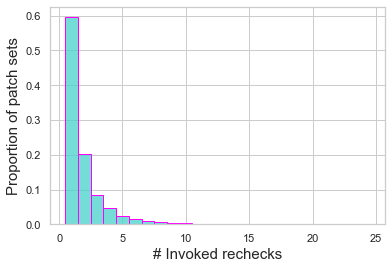

In [6]:
from matplotlib import pyplot as plt
import seaborn as sns

sns.set(font_scale=100)
sns.set_theme(style='whitegrid')

draw_list = [recheck for recheck in recheck_list if recheck < 25]

ax = sns.histplot(data=draw_list, bins=100, discrete=True, element="bars",
                 color='mediumturquoise', stat="probability", edgecolor="magenta")

ax.set_xlabel('# Invoked rechecks',fontsize=15)
ax.set_ylabel('Proportion of patch sets',fontsize=15)

fig = ax.get_figure()
# fig.savefig('../fig/RQ1_number_recheck.pdf', bbox_inches="tight")

In [7]:
# count how many 1 recheck

single_recheck = [recheck for recheck in recheck_list if recheck == 1]

print(f"how many patch set attempts single recheck {round(len(single_recheck) * 100 / len(recheck_list))}%")

how many patch set attempts single recheck 60%
